## Пример работы энтропии-сложности для различных условий

 [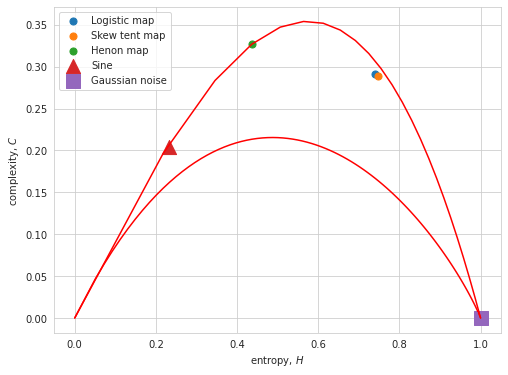](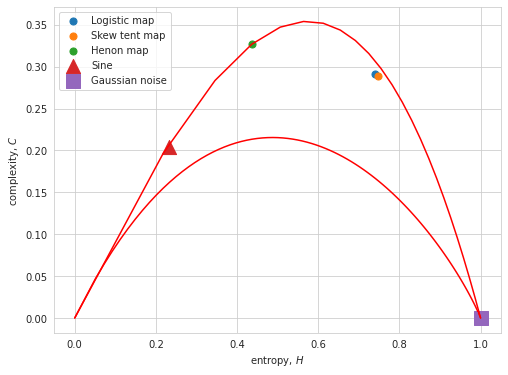)


## Ограничения метода 

Из-за статистических соображений, приминение метода имеет смысл только в одном случае: <br /> 
L >> N! (L - длина ряда, N - параметр метода)

## Чего от нас хочет Громов?


### 1) Найти примерную зависимость между длиной ряда и N! (Что значит "во много раз больше" в ограничениях метода)

<br />
Этот эксперимент является немного абстрактным, так как он будет иметь смысл в большей степени только для искусственных рядов (т.к. их можно генерить сколь угодно большими)


### 2) Найти нормирующую траекторию для любого ряда

### 3) Какая-то адская шиза - надо будет разобраться на следующей встрече

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from entropy_complexity import entropy_complexity, get_borders
from tqdm import tqdm
from math import factorial

In [3]:
trajectory_1 = np.array([[1, 1], [2, 2], [3, 3]])
trajectory_2 = np.array([[10, 10], [6, 4], [5, 9]])

print(trajectory_2 / trajectory_1)

[[10.         10.        ]
 [ 3.          2.        ]
 [ 1.66666667  3.        ]]


In [4]:
for N in tqdm(range(2, 10)):
    M = 1
    min_ec, max_ec = get_borders(n=N, m=M)

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 284.80it/s]


In [ ]:
def functions_testing(inp, checker)->float:
    if checker == 0:
        return 0
    elif checker == 1:
        print("yes")
        n = 10**(len(str(inp)))
        print(n)
        return n
    elif checker == 2:
        n = int(factorial(inp) * np.exp((inp**((1.055+inp/100)))))
        return n


def plotting_test(inp=0, checker=0):
    s1 = ''
    for i in range(2,inp):
        length = functions_testing(i, checker)
        noise = np.random.normal(size=length)
        M = 1
        min_ec, max_ec = get_borders(n=i, m=M)
        EC = entropy_complexity(noise, n=i, m=M)
        print(EC)      
        f, ax = plt.subplots(1,1,figsize=(16, 7))

        ax.plot(max_ec[:,0], max_ec[:,1],color='r')
        ax.plot(min_ec[:,0], min_ec[:,1],color='r')
        counter = 0
        ax.scatter(*EC, label="Noise for function %s" %checker, s=200, marker='.')
           
    # ax.scatter(*EC[-2], label=ts_names[-2], s=200, marker='^')
    # ax.scatter(*EC[-1], label=ts_names[-1], s=200, marker='s')


        ax.set_xlabel('entropy, $H$')
        ax.set_ylabel('complexity, $C$')
        plt.title("Normalized Entropy-Complexity plane, N=%s" % (i), fontsize = 17)
        ax.legend()
        plt.show()

In [ ]:
plotting_test(15, 2)

## Тут будем решать вторую задачу Громова 

In [2]:
def normalizing_function(trajectory, trajectory_norm):
    return trajectory / np.sqrt(trajectory_norm)

In [5]:
#Длина - правая граница / шаг
sin_series = np.sin(np.arange(0,100,.01))
white_noise = np.random.normal(size=len(sin_series))

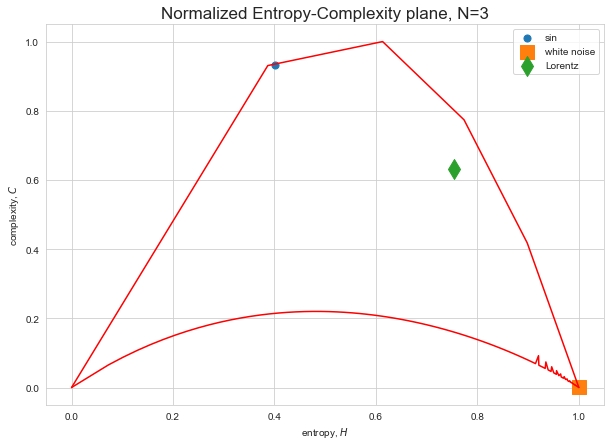

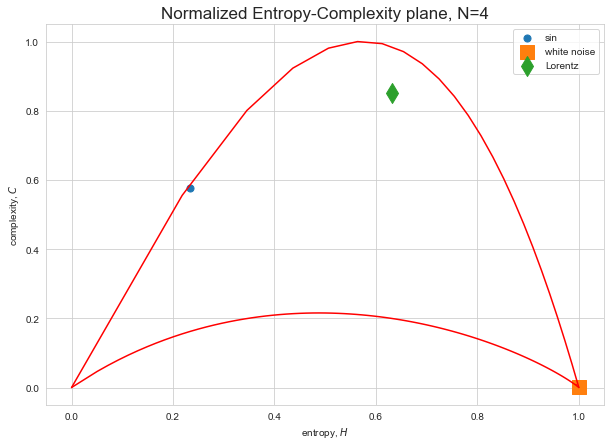

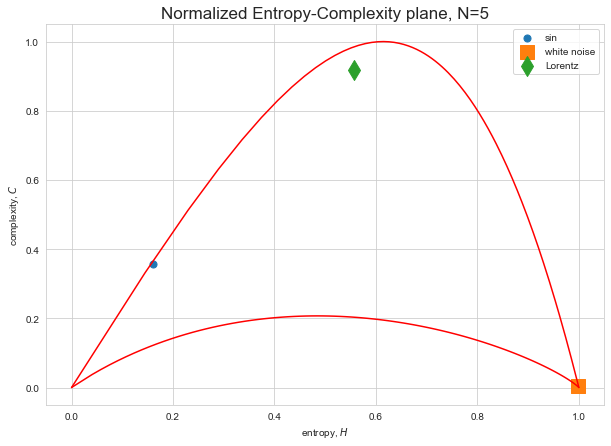

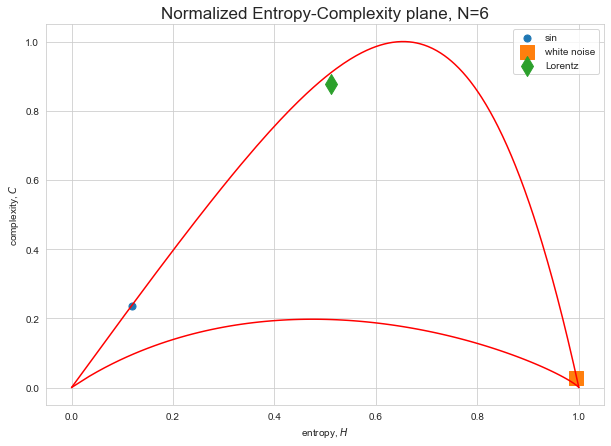

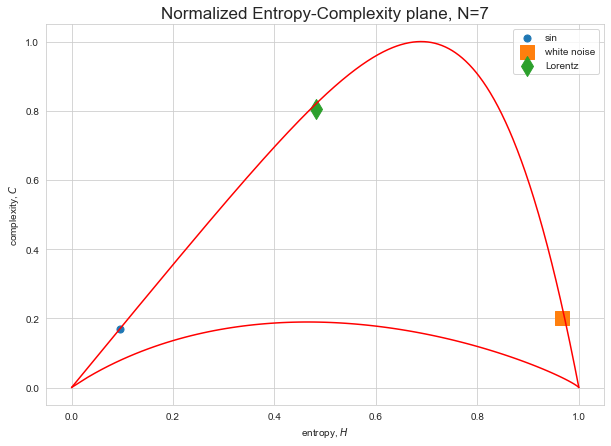

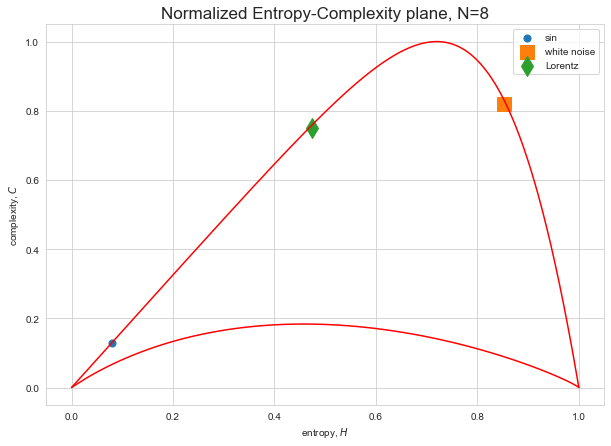

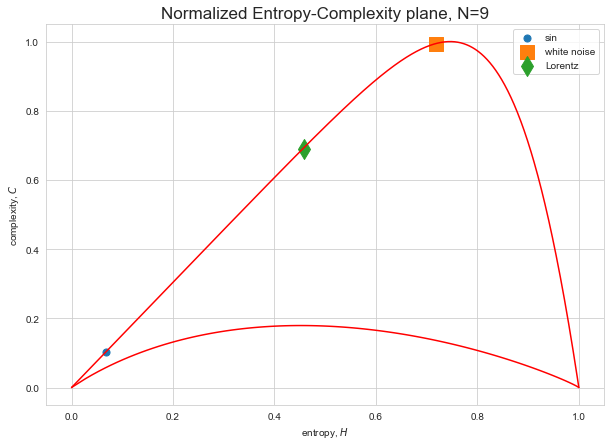

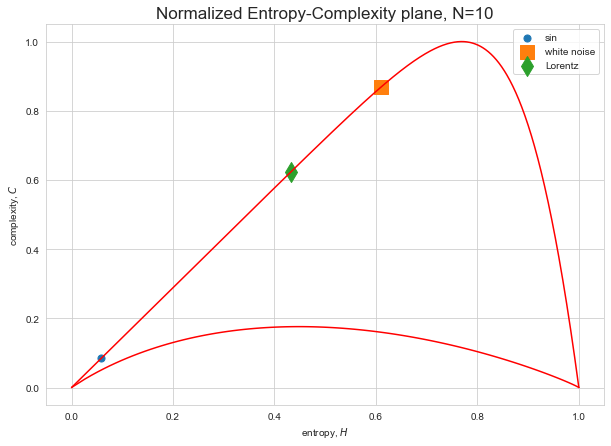

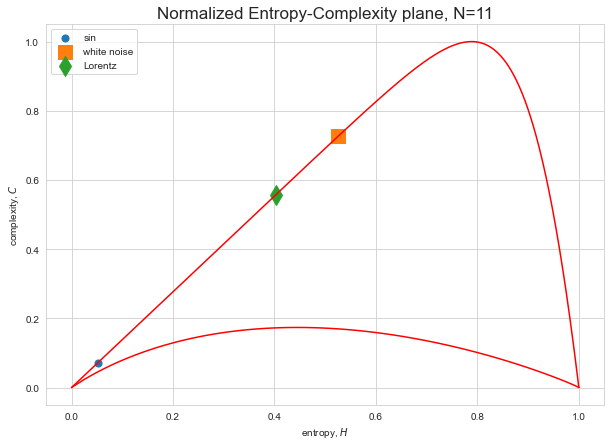

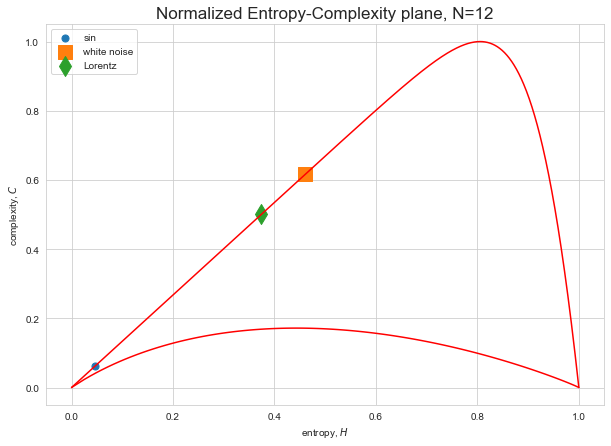

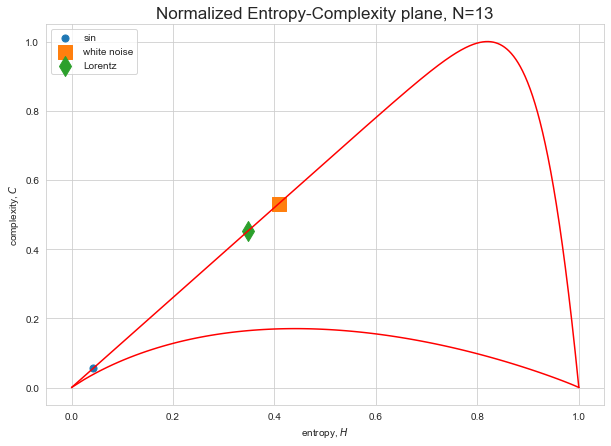

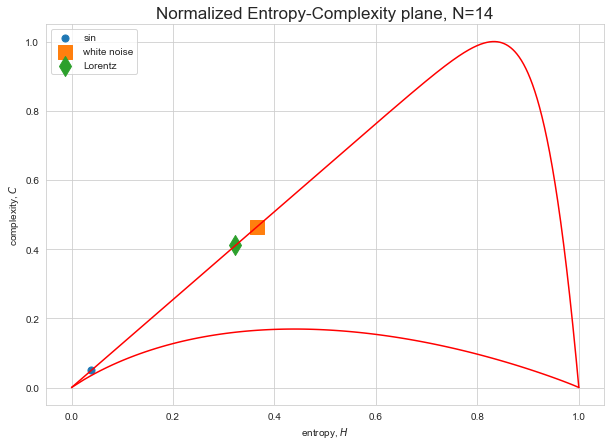

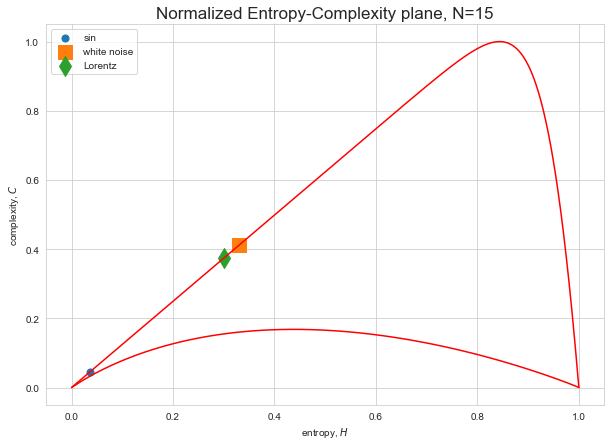

In [30]:
sin_trajectory = []
noise_trajectory = []
lorentz_trajectory = []
for N in range(3, 16):
    M = 1
    min_ec, max_ec = get_borders(n=N, m=M)
    apex = max(max_ec.T[1])
    max_ec.T[1] /= apex #нормализуем верхнюю границу плоскости
    
    ec_sin = list(entropy_complexity(sin_series, n=N, m=M))
    ec_sin[1] /= apex
    sin_trajectory.append(ec_sin)
    
    ec_noise = list(entropy_complexity(white_noise, n=N, m=M))
    ec_noise[1] /= apex
    noise_trajectory.append(ec_noise)
    
    ec_lorentz = list(entropy_complexity(Lorentz, n=N, m=M))
    ec_lorentz[1] /= apex
    lorentz_trajectory.append(ec_lorentz)
    
    
    
    f, ax = plt.subplots(1,1,figsize=(10, 7))
    ax.plot(max_ec[:,0], max_ec[:,1],color='r')
    ax.plot(min_ec[:,0], min_ec[:,1],color='r')
    
    ax.scatter(*ec_sin, label="sin", s=200, marker='.')
    ax.scatter(*ec_noise, label="white noise", s=200, marker='s')
    ax.scatter(*ec_lorentz, label="Lorentz", s=200, marker='d')
    
    ax.set_xlabel('entropy, $H$')
    ax.set_ylabel('complexity, $C$')
    plt.title("Normalized Entropy-Complexity plane, N=%s" % (N), fontsize = 17)
    ax.legend()
    plt.show()

In [31]:
normalized_lorentz = normalizing_function(np.array(lorentz_trajectory), 
                                      np.array(noise_trajectory))

normalized_sin = normalizing_function(np.array(sin_trajectory), 
                                      np.array(noise_trajectory))

normalized_sin_sqrt = normalizing_function(np.array(sin_trajectory), 
                                      np.power(np.array(noise_trajectory), 0.25))

<AxesSubplot:>

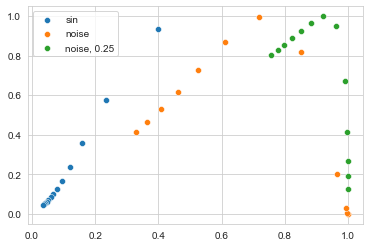

In [32]:
sns.scatterplot(x=np.array(sin_trajectory).T[0], y =np.array(sin_trajectory).T[1], label="sin")
sns.scatterplot(x=np.array(noise_trajectory).T[0], y =np.array(noise_trajectory).T[1], label="noise")
sns.scatterplot(x=np.power(np.array(noise_trajectory), 0.25).T[0], 
                y=np.power(np.array(noise_trajectory), 0.25).T[1], label="noise, 0.25")

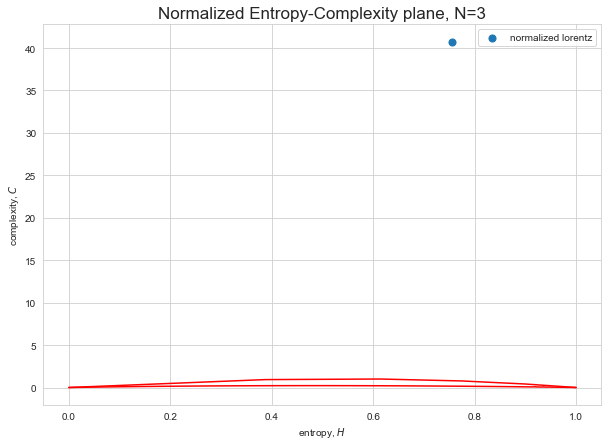

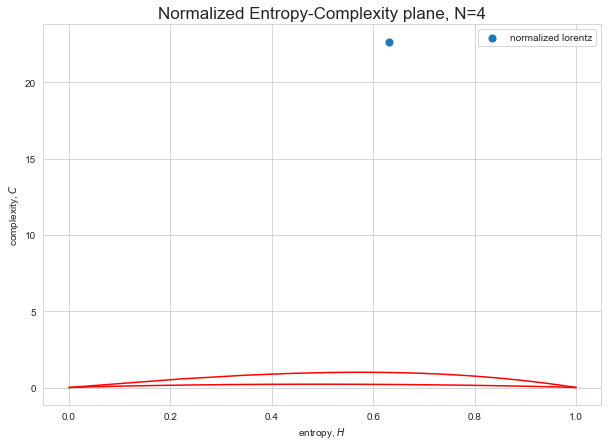

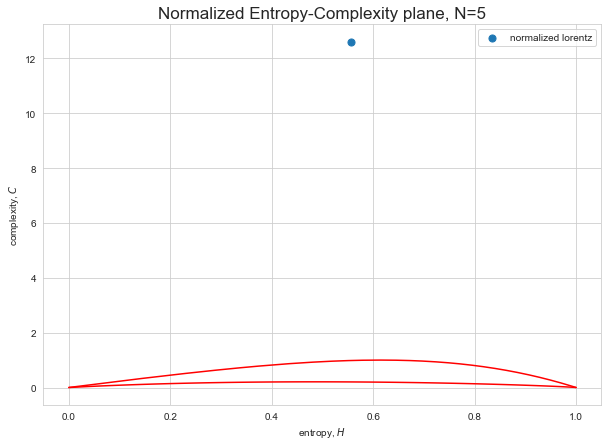

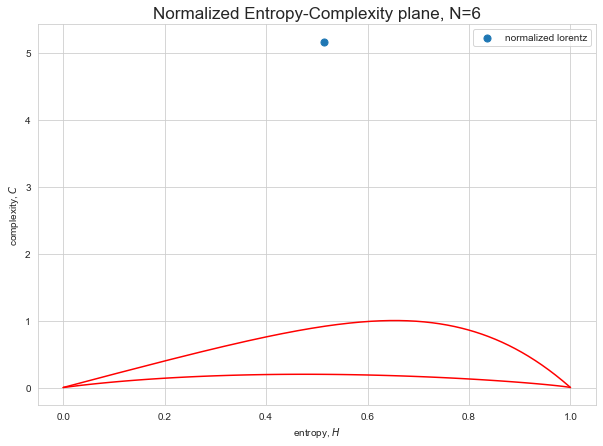

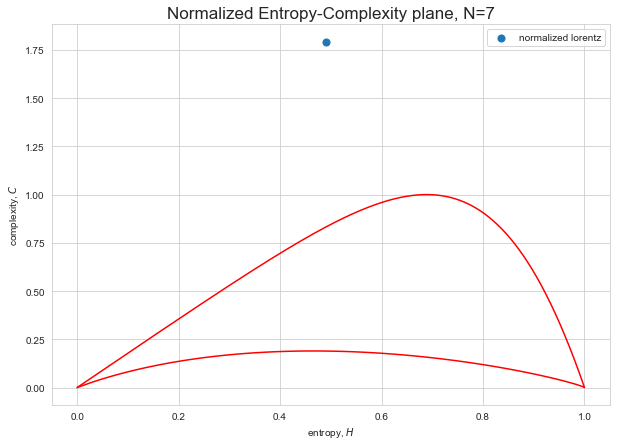

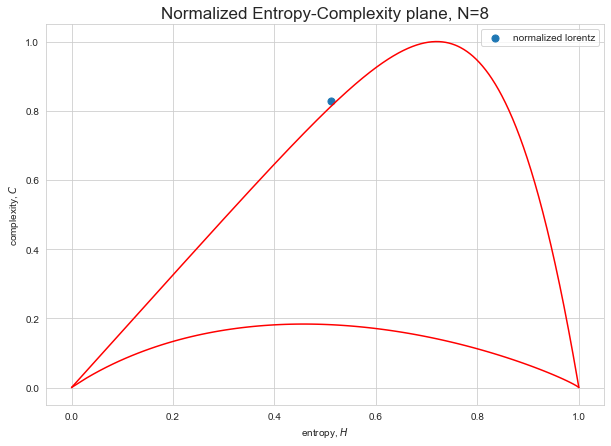

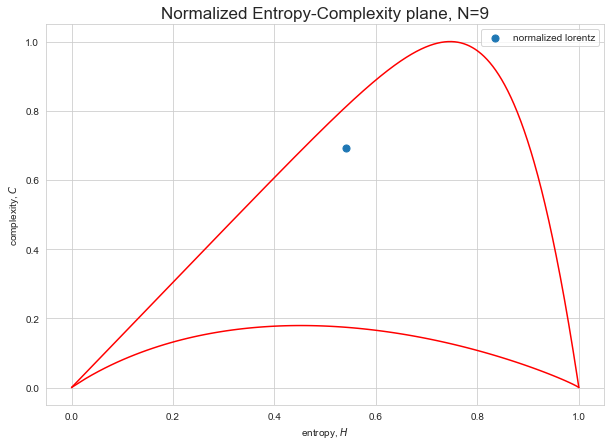

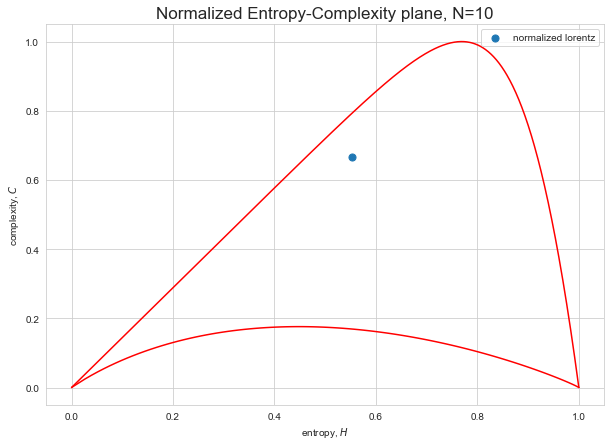

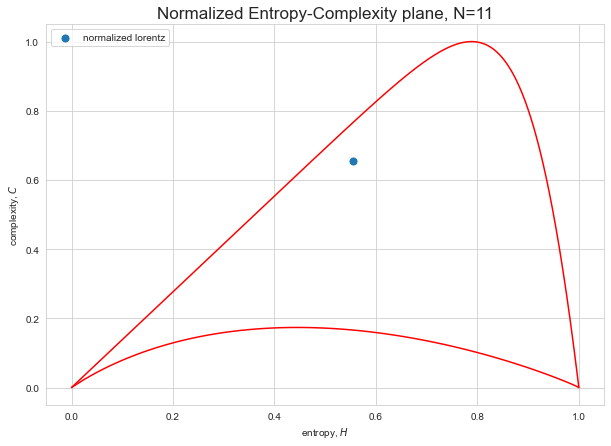

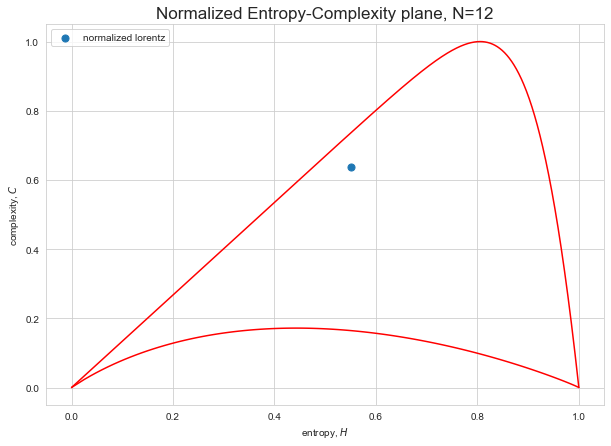

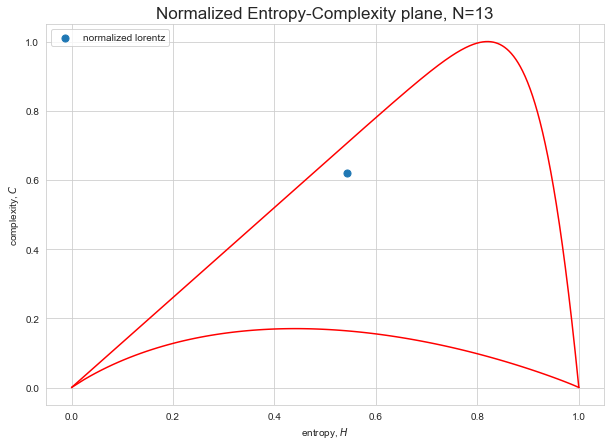

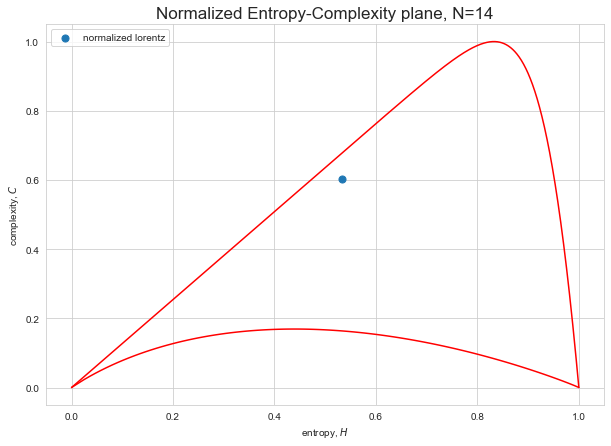

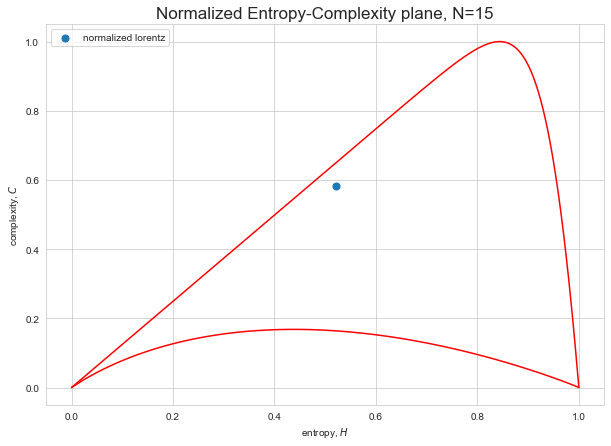

In [33]:
for N in range(3, 16):
    M = 1
    
    min_ec, max_ec = get_borders(n=N, m=M)
    apex = max(max_ec.T[1])
    max_ec.T[1] /= apex
    
    f, ax = plt.subplots(1,1,figsize=(10, 7))
    ax.plot(max_ec[:,0], max_ec[:,1],color='r')
    ax.plot(min_ec[:,0], min_ec[:,1],color='r')
    
    ax.scatter(*normalized_lorentz[N-3], label="normalized lorentz", s=200, marker='.')
    
    ax.set_xlabel('entropy, $H$')
    ax.set_ylabel('complexity, $C$')
    plt.title("Normalized Entropy-Complexity plane, N=%s" % (N), fontsize = 17)
    ax.legend()
    plt.show()

In [24]:
class Lorentz:
    def __init__(self, s = 10, r = 28, b = 8/3):
        self.s = s
        self.r = r
        self.b = b

    #Differential equations of a Lorenz System
    def X(self, x, y, s):
        return s * (y - x)

    def Y(self, x, y, z, r):
        return (-x) * z + r * x - y

    def Z(self, x, y, z, b):
        return x * y - b * z

    #RK4 for the differential equations
    def RK4(self, x, y, z, s, r, b, dt):
        k_1 = self.X(x, y, s)
        l_1 = self.Y(x, y, z, r)
        m_1 = self.Z(x, y, z, b)

        k_2 = self.X((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), s)
        l_2 = self.Y((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), r)
        m_2 = self.Z((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), b)

        k_3 = self.X((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), s)
        l_3 = self.Y((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), r)
        m_3 = self.Z((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), b)

        k_4 = self.X((x + k_3 * dt), (y + l_3 * dt), s)
        l_4 = self.Y((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), r)
        m_4 = self.Z((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), b)

        x += (k_1 + 2 * k_2 + 2 * k_3 + k_4) * dt * (1/6)
        y += (l_1 + 2 * l_2 + 2 * l_3 + l_4) * dt * (1/6)
        z += (m_1 + 2 * m_2 + 2 * m_3 + m_4) * dt * (1/6)

        return (x, y, z)

    def generate(self, dt, steps):
        #Initial values and Parameters
        x_0, y_0, z_0 = 1, 1, 1

        #RK4 iteration
        x_list = [x_0]
        y_list = [y_0]
        z_list = [z_0]

        i = 0

        while i < steps:
            x = x_list[i]
            y = y_list[i]
            z = z_list[i]

            position = self.RK4(x, y, z, self.s, self.r, self.b, dt)

            x_list.append(position[0])
            y_list.append(position[1])
            z_list.append(position[2])

            i += 1

        x_array = np.array(x_list)
        y_array = np.array(y_list)
        z_array = np.array(z_list)

        return x_array, y_array, z_array

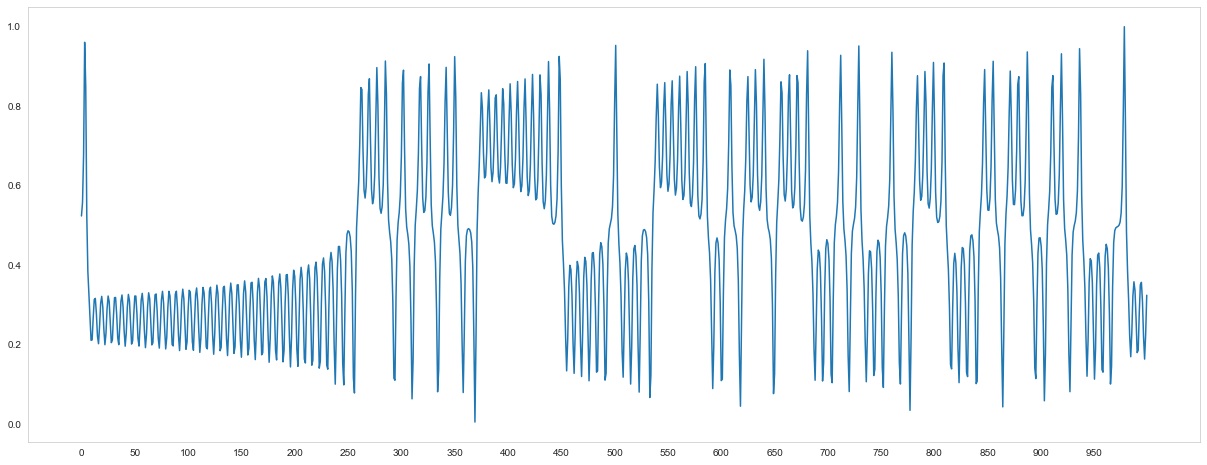

In [25]:
xs, _, _ = Lorentz().generate(0.1, 10000)
xs = (xs - xs.min()) / (xs.max() - xs.min())
Lorentz = xs[:-1]
plt.figure(figsize=(21, 8))
plt.plot(Lorentz[0:1000])
plt.xticks([i for i in range(0, 1000, 50)])
plt.grid()
plt.show()

In [ ]:
# L = f(n!)
# n! = f^(-1)(L) => [n_0, n_1, ..., n_k]